In [1]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
# loading the data into the notebook

df = pd.read_csv('netflix.csv')

In [3]:
# first 5 rows of the data

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# last 5 rows of the data

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.size

105684

In [6]:
#dataframe is 2D

df.ndim

2

In [7]:
df.shape

(8807, 12)

In [8]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# description of the data

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
# checking null values

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# checking for empty values within the dataframe

df.empty

False

In [12]:
# column names of the dataframe

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# checking the index values

df.index

RangeIndex(start=0, stop=8807, step=1)

In [14]:
# data types of all the attributes

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [15]:
# checking for unique values of each column

df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [16]:
# checking the unique values in rating column as it has only 17 unique values

df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
# possible jumbling of data = '84 min' belongs to duration column. Likewise, 66 min and 74 min are also misplaced values from duration column.

df[(df['rating'] == '84 min') | (df['rating'] == '66 min') | (df['rating'] == '74 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [18]:
# shifting the wrong values in rating column to duration column

df.loc[[5541, 5813, 5794],'duration'] = df.loc[[5541, 5813, 5794],'rating']

In [19]:
# changing the value in rating column to empty string value.

df.loc[[5541, 5813, 5794],'rating'] = ''

In [20]:
df.loc[[5541, 5813, 5794]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,,66 min,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [21]:
df['type'] = df['type'].astype('category')

In [22]:
df['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

In [23]:
# unnesting in columns - director, cast, country, listed_in
# Step 1 : Split multiple values

df['director'] = df['director'].str.split(', ')
df['cast'] = df['cast'].str.split(', ')
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')

In [24]:
# Step 2: Unnest the lists

df = df.explode('director')
df = df.explode('cast')
df = df.explode('country')
df = df.explode('listed_in')

In [25]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [26]:
# dropping show_id and description columns as they are not useful for the analysis.

df.drop(columns = ['description', 'show_id'], inplace = True)

In [27]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
1,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...
8806,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies
8806,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals
8806,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas
8806,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies


In [28]:
df['rating'] = df['rating'].replace(np.nan, '')

In [29]:
df['country'] = df['country'].fillna('Not Listed')

In [30]:
df['cast'] = df['cast'].fillna('Unknown Actor')

In [31]:
df['director'] = df['director'].fillna('Unknown Director')

In [32]:
df['date_added'] = df['date_added'].fillna('1800-01-01')

In [33]:
#1. Top 10 movie genre

# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie']

# Group by genre and count the number of unique movie titles
top_genre = movies_df.groupby('listed_in')['title'].nunique().reset_index(name='count')

# Sorting the result to get the top genres
top_genre = top_genre.sort_values(by='count', ascending=False).reset_index()
top_genre.drop(columns = 'index', inplace = True)
top_genre

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


In [34]:
# Converting 'listed_in' to a string for word cloud
text = ' '.join(top_genre['listed_in'])

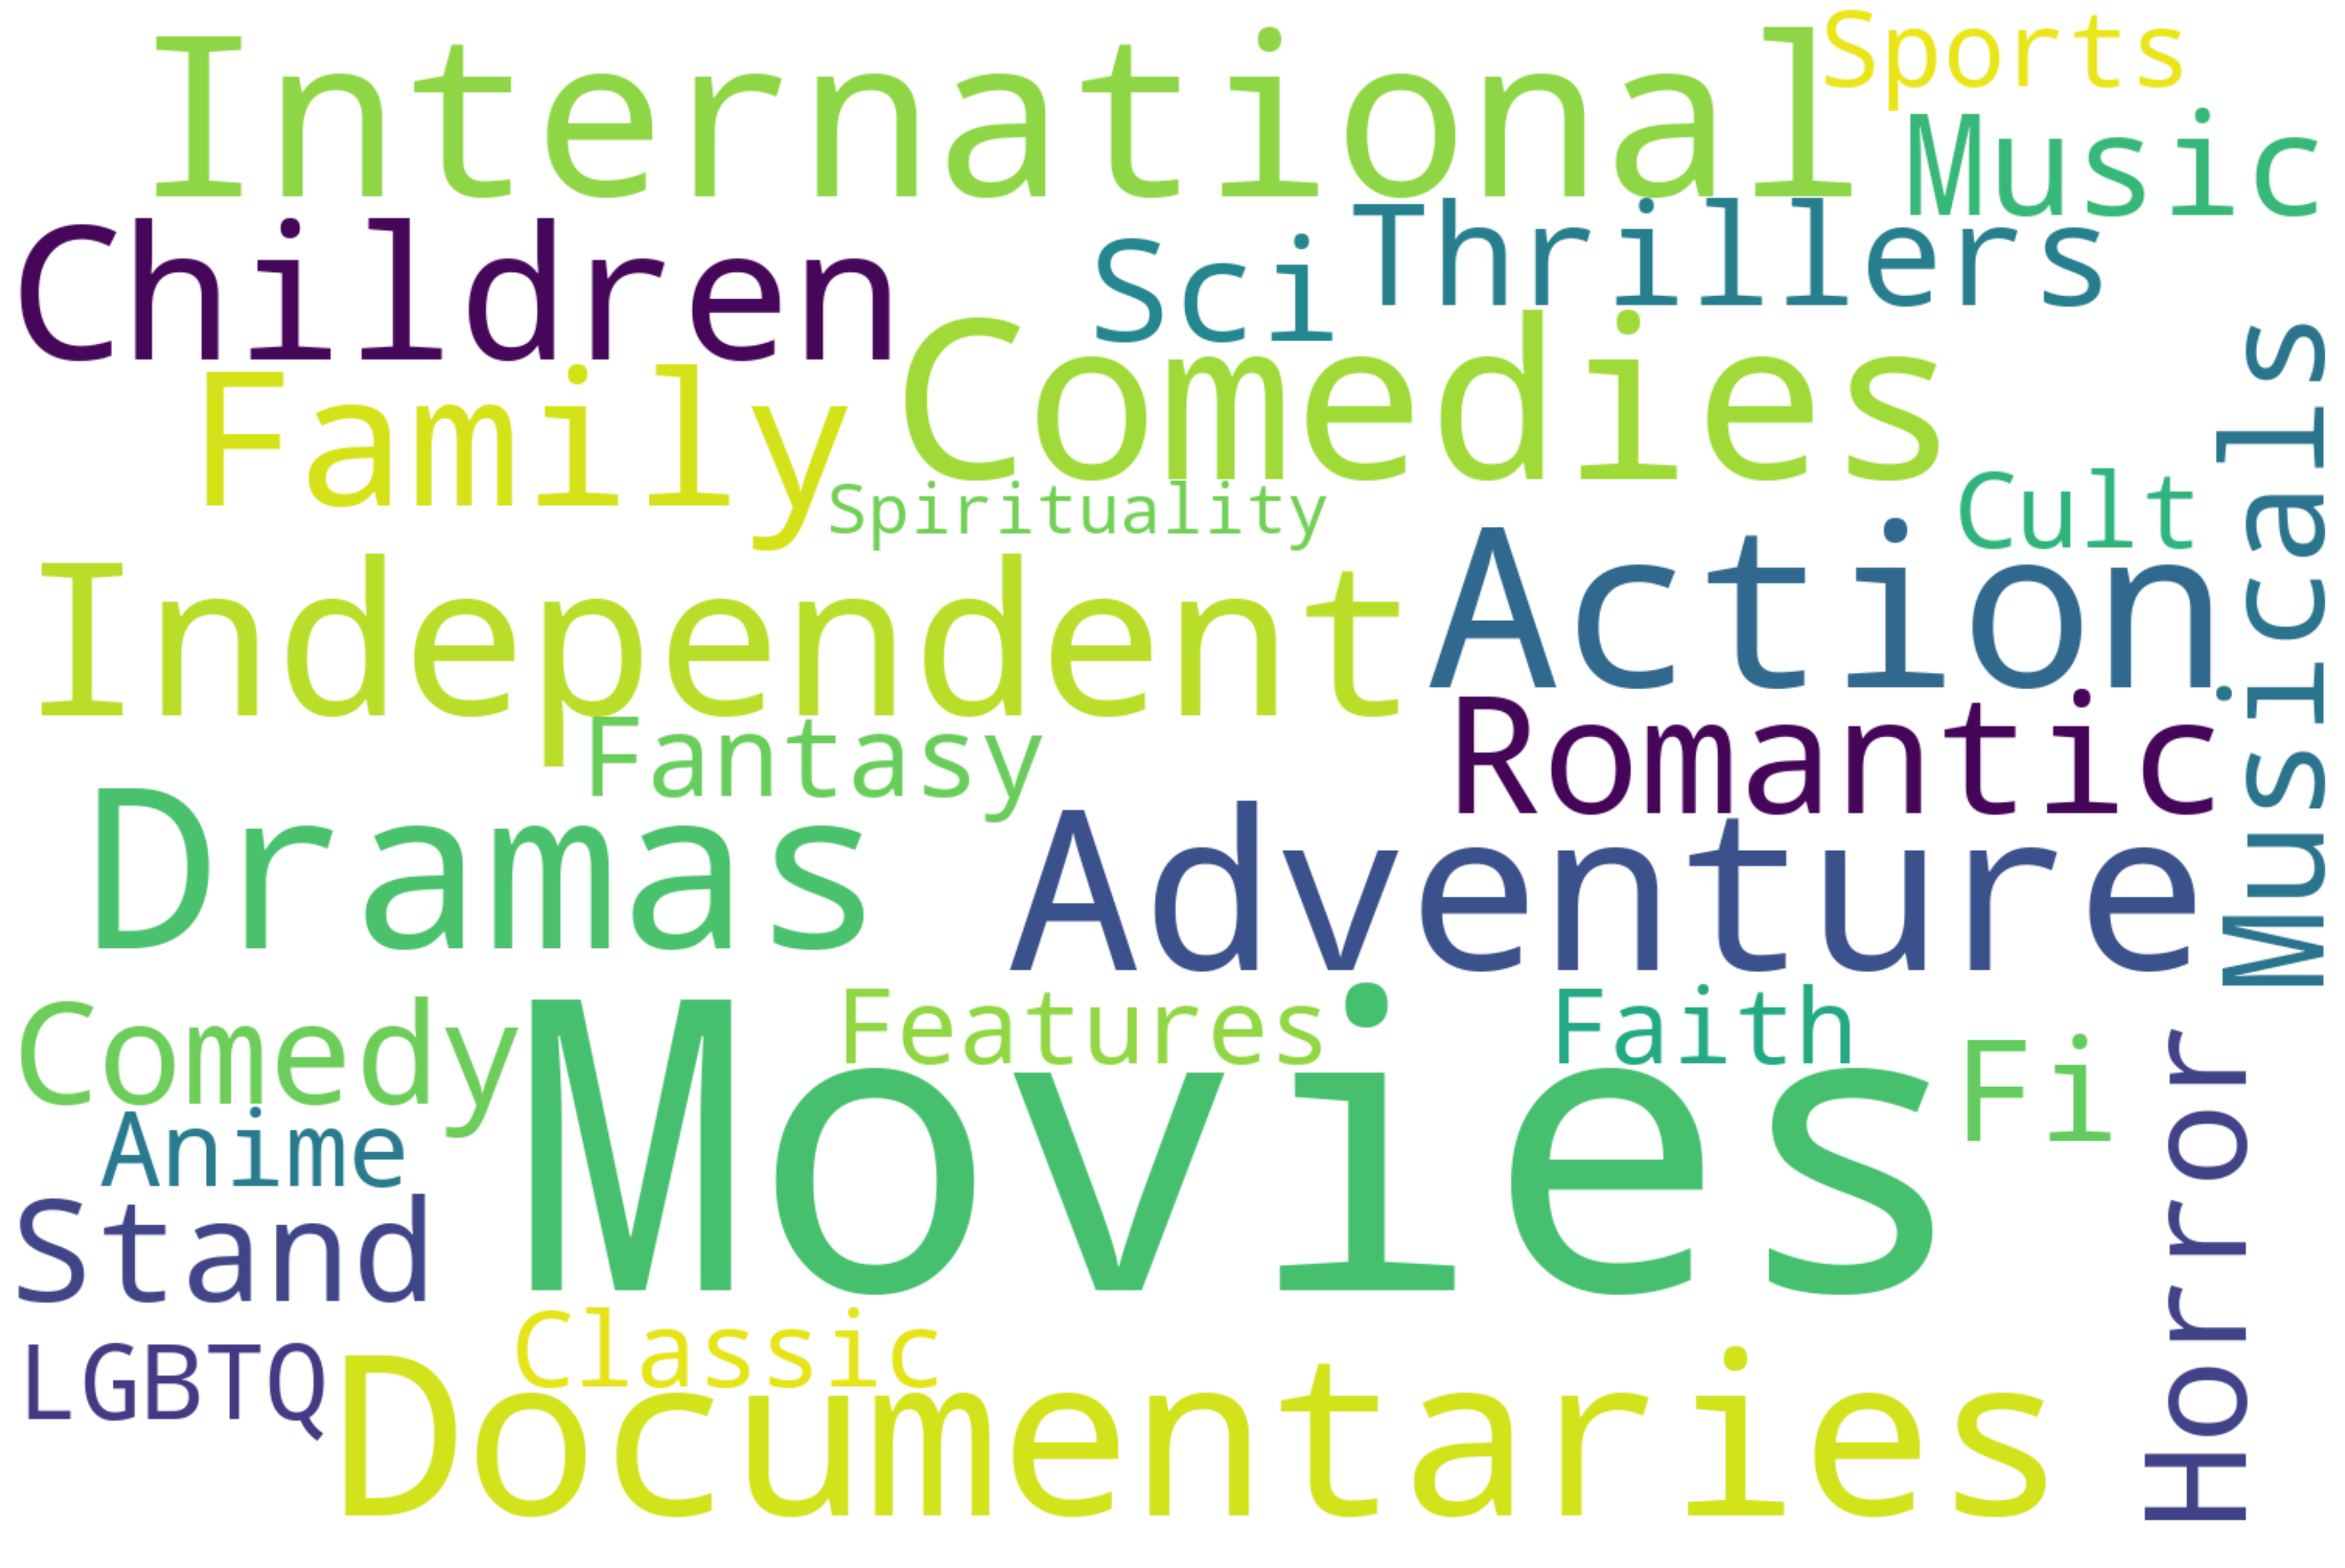

In [35]:
# Generating a word cloud
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(text)

# Displaying the generated word cloud using matplotlib
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
#2. What is the distribution of movies and tv shows in the dataframe?

# Drop duplicate titles to count each title only once
unique_titles_df = df.drop_duplicates(subset=['title'])

type_dist = unique_titles_df['type'].value_counts()
type_dist

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

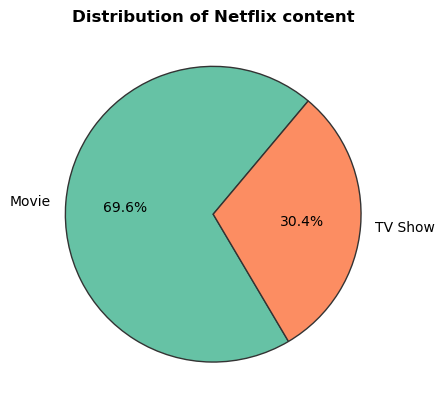

In [37]:
# Creating a pie chart for the distribution of Netflix content using the above data.
color = sns.color_palette("Set2", 9)
plt.pie(type_dist, labels = type_dist.index, autopct='%1.1f%%', colors = color, startangle = 50, wedgeprops = {'edgecolor': '#333333', 'linewidth':1})
plt.title('Distribution of Netflix content', fontweight = 'bold')
plt.show()

In [38]:
def x(y):
    y['countries'] = y[y['country'] != 'Not Listed']['country']
    return y['countries']

In [39]:
#3. Comparison of tv shows vs. movies.
# a. Find the number of movies produced in each country and pick the top 10 countries.

# Drop duplicate titles to count each title only once
unique_titles_df = df.drop_duplicates(subset=['title', 'type'])

top_countries_by_movie = unique_titles_df[(unique_titles_df['type'] == 'Movie') & (unique_titles_df['country'] != 'Not Listed')].groupby(['country'])['title'].nunique().sort_values(ascending = False).reset_index().head(10)
top_countries_by_movie

# US leads by a great margin, followed by India and UK.

,country,title
0,United States,2363
1,India,927
2,United Kingdom,380
3,Canada,187
4,France,148
5,Spain,129
6,Egypt,98
7,Nigeria,87
8,Mexico,86
9,Japan,85


In [40]:
#3. Comparison of tv shows vs. movies.
#b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

# Drop duplicate titles to count each title only once
unique_titles_df = df.drop_duplicates(subset=['title', 'type'])

top_countries_by_TVshow = unique_titles_df[(unique_titles_df['type'] == 'TV Show') & (unique_titles_df['country'] != 'Not Listed')].groupby(['country'])['title'].nunique().sort_values(ascending = False).reset_index().head(10)
top_countries_by_TVshow

#US leads by a big margin, followed by UK and Japan.

,country,title
0,United States,847
1,United Kingdom,246
2,Japan,174
3,South Korea,164
4,Canada,84
5,India,81
6,Taiwan,70
7,France,64
8,Australia,56
9,Spain,52


In [41]:
#4. What is the best time to launch a TV show/movie?

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors = 'coerce')

# Drop duplicate titles to count each title only once
unique_titles_df = df.drop_duplicates(subset=['title', 'type'])

# Extracting week information
unique_titles_df['week_added'] = unique_titles_df['date_added'].dt.isocalendar().week

# Grouping by week and type
week_counts = unique_titles_df.groupby(['week_added', 'type']).size().reset_index(name='count')

# Separating the counts for TV shows and movies.
tv_show_counts = week_counts[week_counts['type'] == 'TV Show'].sort_values(by = 'count', ascending = False).head()
movie_counts = week_counts[week_counts['type'] == 'Movie'].sort_values(by = 'count', ascending = False).head()

C:\Users\Harsha\AppData\Local\Temp\ipykernel_23264\3256729298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_titles_df['week_added'] = unique_titles_df['date_added'].dt.isocalendar().week


In [42]:
#4a(1). Find which is the best week to release a Tv-show
tv_show_counts = tv_show_counts.reset_index()
tv_show_counts.drop(columns = 'index', inplace = True)
tv_show_counts

,week_added,type,count
0,27,TV Show,85
1,31,TV Show,79
2,24,TV Show,75
3,35,TV Show,73
4,13,TV Show,73


In [43]:
#4a(2). Find which is the best week to release a movie.
movie_counts = movie_counts.reset_index()
movie_counts.drop(columns = 'index', inplace = True)
movie_counts

,week_added,type,count
0,1,Movie,316
1,44,Movie,243
2,40,Movie,215
3,9,Movie,207
4,26,Movie,195


In [44]:
#4. What is the best time to launch a TV show/movie?

# Extracting month information
df['month_added'] = df['date_added'].dt.month

# Drop duplicate titles to count each title only once
unique_titles_df = df.drop_duplicates(subset=['title', 'type'])

# Grouping by month and type
month_counts = unique_titles_df.groupby(['month_added', 'type']).size().reset_index(name='count')

# Separating the counts for TV shows and movies.
tv_show_month = month_counts[month_counts['type'] == 'TV Show'].sort_values(by = 'month_added')
movie_month = month_counts[month_counts['type'] == 'Movie'].sort_values(by = 'month_added')

In [45]:
#4b(1). Find which is the best month to release a Tv-show.
tv_show_month  = tv_show_month.reset_index()
tv_show_month.drop(columns = 'index', axis = 1,inplace = True)
tv_show_month

,month_added,type,count
0,1.0,TV Show,181
1,2.0,TV Show,175
2,3.0,TV Show,205
3,4.0,TV Show,209
4,5.0,TV Show,187
5,6.0,TV Show,232
6,7.0,TV Show,254
7,8.0,TV Show,230
8,9.0,TV Show,246
9,10.0,TV Show,210


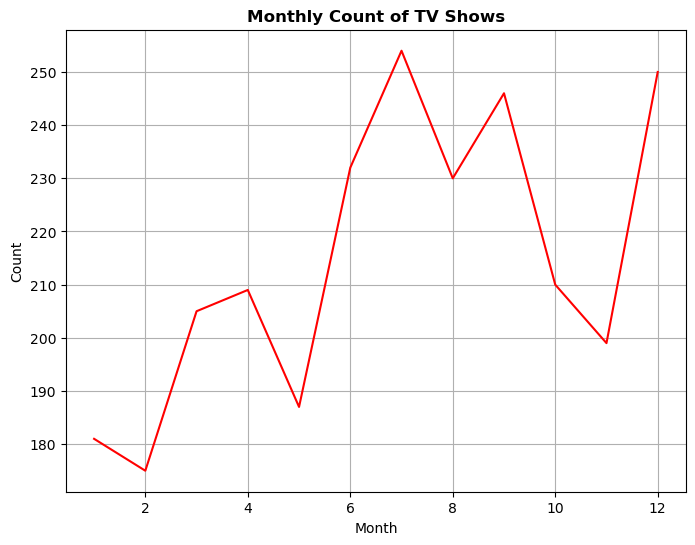

In [46]:
#4b(1). Creating a line plot to visualise the best month to release a Tv-show.

plt.figure(figsize=(8, 6))
plt.plot(tv_show_month['month_added'],tv_show_month['count'], color = 'red')
plt.xlabel("Month") 
plt.ylabel("Count") 
plt.title('Monthly Count of TV Shows', fontweight = 'bold')
plt.grid(True) 
plt.show()

In [47]:
#4b(2). Find which is the best month to release a movie.

movie_month = movie_month.reset_index()
movie_month.drop(columns = 'index', axis = 1,inplace = True)
movie_month

,month_added,type,count
0,1.0,Movie,546
1,2.0,Movie,382
2,3.0,Movie,529
3,4.0,Movie,550
4,5.0,Movie,439
5,6.0,Movie,492
6,7.0,Movie,565
7,8.0,Movie,519
8,9.0,Movie,519
9,10.0,Movie,545


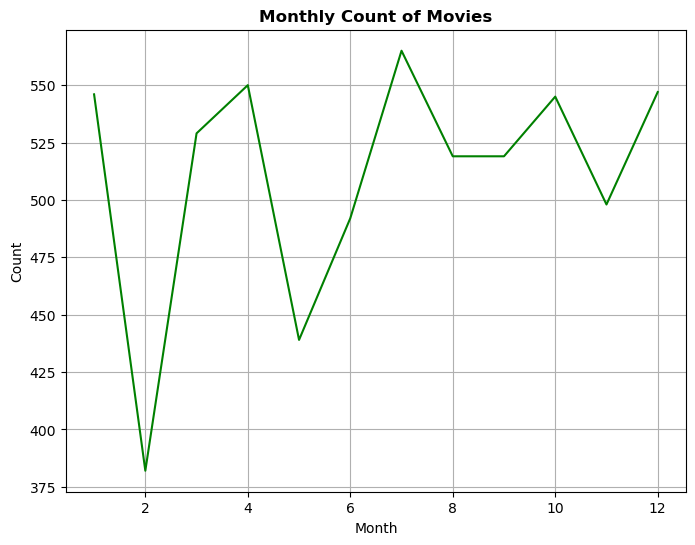

In [48]:
#4b(1). Creating a line plot to visualise the best month to release a movie.

plt.figure(figsize=(8, 6))
plt.plot(movie_month['month_added'],movie_month['count'], color = 'green')
plt.xlabel("Month") 
plt.ylabel("Count") 
plt.title('Monthly Count of Movies', fontweight = 'bold')
plt.grid(True) 
plt.show()

In [49]:
#5. Analysis of actors/directors of different types of shows/movies.
#a. Identify the top 10 directors who have appeared in most movies or TV shows.

# Grouping by directors and counting the unique titles for each director and type
director_counts = df.groupby(['director', 'type'])['title'].nunique().reset_index(name='count')

# Filtering out rows with 'Unknown Director'
director_counts = director_counts[director_counts['director'] != 'Unknown Director']

# Filtering the rows by specifying the 'type'
movie_directors = director_counts[director_counts['type'] == 'Movie']
tv_show_directors = director_counts[director_counts['type'] == 'TV Show']

In [50]:
# Sorting by count in descending order to get the top directors of movies.
top_movie_directors = movie_directors.sort_values(by='count', ascending=False).head(10)
top_movie_directors = top_movie_directors.reset_index()
top_movie_directors.drop(columns = 'index', inplace = True)
top_movie_directors

,director,type,count
0,Rajiv Chilaka,Movie,22
1,Jan Suter,Movie,21
2,Raúl Campos,Movie,19
3,Suhas Kadav,Movie,16
4,Jay Karas,Movie,15
5,Marcus Raboy,Movie,15
6,Cathy Garcia-Molina,Movie,13
7,Martin Scorsese,Movie,12
8,Jay Chapman,Movie,12
9,Youssef Chahine,Movie,12


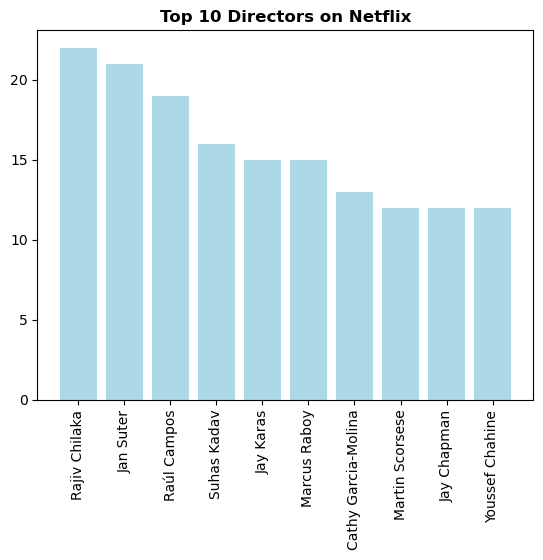

In [51]:
# Creating a bar graph to visualise the above data!

x = top_movie_directors['director']
y = top_movie_directors['count']

plt.bar(x,y, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Top 10 Directors on Netflix",fontweight = 'bold')
plt.show()

In [52]:
# Sorting by count in descending order to get the top directors of tv shows.
top_tv_show_directors = tv_show_directors.sort_values(by='count', ascending=False).head(10)
top_tv_show_directors = top_tv_show_directors.reset_index()
top_tv_show_directors.drop(columns = 'index', inplace = True)
top_tv_show_directors

,director,type,count
0,Alastair Fothergill,TV Show,3
1,Ken Burns,TV Show,3
2,Stan Lathan,TV Show,2
3,Lynn Novick,TV Show,2
4,Iginio Straffi,TV Show,2
5,Jung-ah Im,TV Show,2
6,Gautham Vasudev Menon,TV Show,2
7,Hsu Fu-chun,TV Show,2
8,Shin Won-ho,TV Show,2
9,Joe Berlinger,TV Show,2


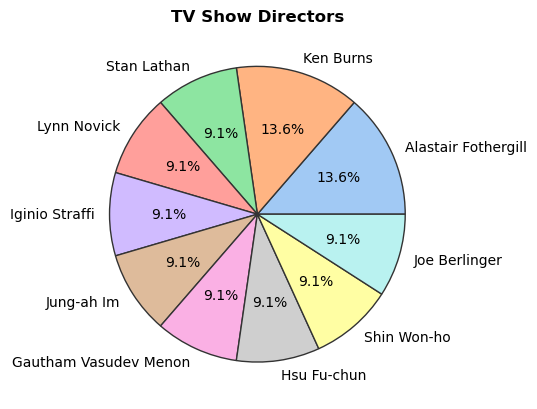

In [53]:
# Extracting the counts and director names
counts = top_tv_show_directors['count']
director_names = top_tv_show_directors['director']

# Creating a pie chart to visualize the above data!
color = sns.color_palette("pastel", 10)
plt.pie(counts, labels = director_names, autopct='%1.1f%%', colors = color, wedgeprops = {'edgecolor': '#333333', 'linewidth':1})
plt.title('TV Show Directors', fontweight = 'bold')
plt.show()

In [54]:
#5. Analysis of actors/directors of different types of shows/movies.
#b. Identify the top 10 actors who have appeared in most movies or TV shows.

# Grouping by actors and counting the unique titles for each director and type
actor_counts = df.groupby(['cast', 'type'])['title'].nunique().reset_index(name='count')

# Filtering out rows with 'Unknown Actor'
actor_counts = actor_counts[actor_counts['cast'] != 'Unknown Actor']

# Filtering the rows by specifying the 'type'
movie_actors = actor_counts[actor_counts['type'] == 'Movie']
tv_show_actors = actor_counts[actor_counts['type'] == 'TV Show']

In [55]:
# Sorting by count in descending order to get the top actors of movies.
top_movie_actors = movie_actors.sort_values(by='count', ascending=False).head(10)
top_movie_actors = top_movie_actors.reset_index()
top_movie_actors.drop(columns = 'index', inplace = True)
top_movie_actors

,cast,type,count
0,Anupam Kher,Movie,42
1,Shah Rukh Khan,Movie,35
2,Naseeruddin Shah,Movie,32
3,Om Puri,Movie,30
4,Akshay Kumar,Movie,30
5,Paresh Rawal,Movie,28
6,Amitabh Bachchan,Movie,28
7,Julie Tejwani,Movie,28
8,Boman Irani,Movie,27
9,Rupa Bhimani,Movie,27


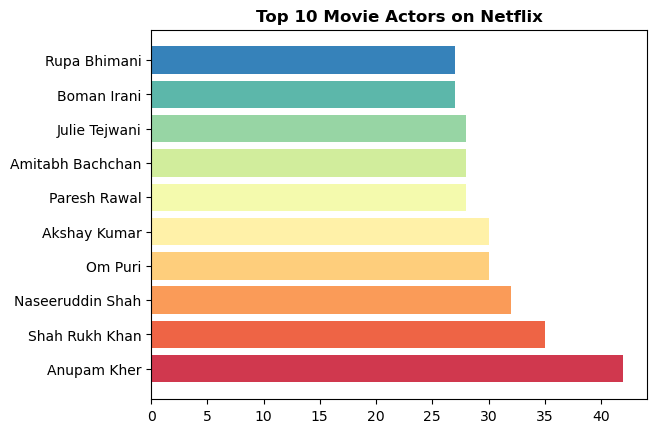

In [56]:
# Creating a bar graph to visualise the above data!

x = top_movie_actors['cast']
y = top_movie_actors['count']

color = sns.color_palette("Spectral", 10)
plt.barh(x,y, color = color)
plt.xticks(fontsize = 10)
plt.title("Top 10 Movie Actors on Netflix",fontweight = 'bold')
plt.show()

In [57]:
# Sorting by count in descending order to get the top actors of movies.
top_tv_actors = tv_show_actors.sort_values(by='count', ascending=False).head(10)
top_tv_actors = top_tv_actors.reset_index()
top_tv_actors.drop(columns = 'index', inplace = True)
top_tv_actors

,cast,type,count
0,Takahiro Sakurai,TV Show,25
1,Yuki Kaji,TV Show,19
2,Daisuke Ono,TV Show,17
3,Junichi Suwabe,TV Show,17
4,Ai Kayano,TV Show,17
5,Yuichi Nakamura,TV Show,16
6,Jun Fukuyama,TV Show,15
7,Yoshimasa Hosoya,TV Show,15
8,David Attenborough,TV Show,14
9,Hiroshi Kamiya,TV Show,13


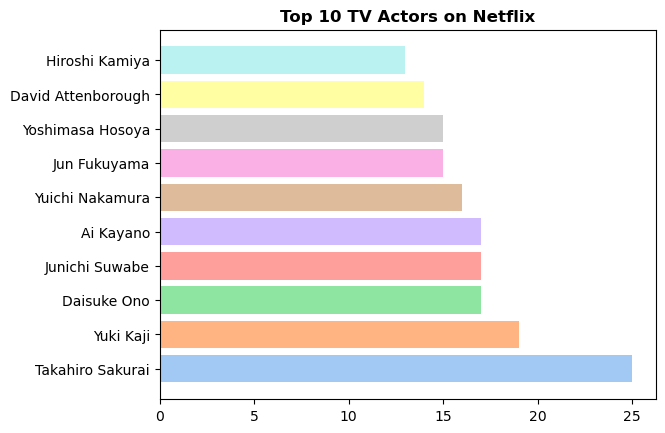

In [58]:
# Creating a bar graph to visualise the above data!

x = top_tv_actors['cast']
y = top_tv_actors['count']

color = sns.color_palette("pastel", 10)
plt.barh(x,y, color = color)
plt.xticks(fontsize = 10)
plt.title("Top 10 TV Actors on Netflix",fontweight = 'bold')
plt.show()